In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from pandas.io.json import json_normalize

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akkrishn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
value = input("Enter Stock Symbol:")

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Stock news articles
stock_headlines = newsapi.get_everything(q=value,
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('stock.json', 'w') as json_file:
   json.dump(stock_headlines, json_file)

In [6]:
# Fetch the Federal Reserve news articles
fed_headlines = newsapi.get_everything(q='fomc',
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('fed.json', 'w') as json_file:
   json.dump(fed_headlines, json_file)

In [7]:
# Create the Stock sentiment scores DataFrame
tc = pd.read_json ('stock.json')
#parse the json and load into a dataframe
stock_df = json_normalize(stock_headlines['articles'])
#drop all columns except for description
stock_df = stock_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = stock_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
stock_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
stock_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
stock_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
stock_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
stock_df

<ipython-input-7-66e34fd750db>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  stock_df = json_normalize(stock_headlines['articles'])


description    Comp    Pos    Neu  \
0   Research analysts of global banks have begun t...  0.0000  0.000  1.000   
1   Goldman Sachs expects the S&P 500 index <a hre...  0.2732  0.118  0.815   
2   Morgan Stanley analysts see the S&P 500 <a hre...  0.1027  0.071  0.870   
3   The Zacks Analyst Blog Highlights: Dillard's, ...  0.0000  0.000  1.000   
4   The Dow was weighed down on Thursday by a coll...  0.2023  0.142  0.739   
..                                                ...     ...    ...    ...   
95  U.S. stock index futures edged higher on Thurs...  0.3182  0.064  0.907   
96  Asian shares followed Wall Street higher in ea...  0.7845  0.230  0.733   
97  Major U.S. stock indexes advanced on Tuesday, ...  0.6808  0.176  0.824   
98  The S&P 500 and Nasdaq rose to record highs on...  0.5106  0.102  0.898   
99  The S&P 500 ended essentially flat on Thursday...  0.7003  0.142  0.858   

      Neg  
0   0.000  
1   0.067  
2   0.060  
3   0.000  
4   0.119  
..    ...  
95  0.029  
96  0.037  
97  0.000  
98  0.000  
99  0.000  

[100 rows x 5 columns]

In [8]:
stock_df.to_csv(r'Headlines.csv', index = False)

In [18]:
# Create the Federal Reserve sentiment scores DataFrame
tc = pd.read_json ('fed.json')
#parse the json and load into a dataframe
fed_df = json_normalize(fed_headlines['articles'])
#drop all columns except for description
fed_df = fed_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = fed_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
fed_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
fed_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
fed_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
fed_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
fed_df

<ipython-input-18-7383dc995c91>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  fed_df = json_normalize(fed_headlines['articles'])


description    Comp    Pos    Neu  \
0   The two-day meeting of the FOMC is expected to...  0.0000  0.000  1.000   
1   Fed Chair Powell press conference video here  ...  0.2732  0.087  0.913   
2   Gold prices slipped on Wednesday ahead of a cr...  0.1027  0.043  0.957   
3   U.S. Federal Reserve officials were strongly e...  0.0516  0.105  0.818   
4   Expectations are the FOMC will announce the ta...  0.1779  0.072  0.928   
..                                                ...     ...    ...    ...   
95  The US central bank will reduce the $120bn a m...  0.0772  0.220  0.612   
96  The Federal Reserve should announce the long-a...  0.7227  0.141  0.859   
97  <ol><li>Stock Futures Steady After Wall Street...  0.0000  0.000  1.000   
98  Growth data on both sides of the Atlantic in t...  0.3818  0.073  0.927   
99  Stock futures traded higher on Monday, with eq...  0.7650  0.248  0.752   

      Neg  
0   0.000  
1   0.000  
2   0.000  
3   0.077  
4   0.000  
..    ...  
95  0.167  
96  0.000  
97  0.000  
98  0.000  
99  0.000  

[100 rows x 5 columns]

In [19]:
fed_df.to_csv(r'FOMC.csv', index = False)

In [20]:
# Describe the stock Sentiment
stock_df.describe()

Comp         Pos         Neu         Neg
count  100.000000  100.000000  100.000000  100.000000
mean     0.283489    0.112920    0.851190    0.035880
std      0.437475    0.090507    0.090116    0.061359
min     -0.790600    0.000000    0.603000    0.000000
25%      0.000000    0.063500    0.793000    0.000000
50%      0.381800    0.099000    0.859500    0.000000
75%      0.636900    0.167750    0.925000    0.061750
max      0.921700    0.344000    1.000000    0.264000

In [11]:
# Describe the fed Sentiment
fed_df.describe()

Comp         Pos         Neu         Neg
count  100.000000  100.000000  100.000000  100.000000
mean     0.203349    0.083790    0.888990    0.027220
std      0.366177    0.080264    0.093092    0.052464
min     -0.648600    0.000000    0.612000    0.000000
25%      0.000000    0.000000    0.817000    0.000000
50%      0.190100    0.077000    0.898500    0.000000
75%      0.485175    0.137250    1.000000    0.045250
max      0.793500    0.291000    1.000000    0.273000

In [12]:
#Tokenizing function libraries to import including the tokenizer and lemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Complete the tokenizer function which removes the stopwords and the punctuation and keeps the relevant words
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [15]:
# Create a new tokens column for the stock
stock_df['tokens'] = stock_df.apply(lambda x : tokenizer(x['description']), axis=1)
stock_df

description    Comp    Pos    Neu  \
0   Goldman Sachs expects the S&P 500 index <a hre...  0.2732  0.118  0.815   
1   Research analysts of global banks have begun t...  0.0000  0.000  1.000   
2   Morgan Stanley analysts see the S&P 500 <a hre...  0.1027  0.071  0.870   
3   The Zacks Analyst Blog Highlights: Dillard's, ...  0.0000  0.000  1.000   
4   The Dow was weighed down on Thursday by a coll...  0.2023  0.142  0.739   
..                                                ...     ...    ...    ...   
95  Inflation fears pressured Asian stocks and buo... -0.3182  0.060  0.823   
96  The dollar reached a four-and-a-half-year high...  0.2023  0.183  0.719   
97  The S&P 500 and Nasdaq remained positive into ...  0.5574  0.096  0.904   
98  Both the S&P 500 and the Nasdaq eked out recor...  0.3818  0.075  0.925   
99  Stock indexes mostly rose worldwide on Wednesd...  0.0000  0.000  1.000   

      Neg                                             tokens  
0   0.067  goldman, sachs, expects, sp, index, hrefhttpsw...  
1   0.000  research, analyst, global, bank, begun, roll, ...  
2   0.060  morgan, stanley, analyst, see, sp, hrefhttpsww...  
3   0.000  zacks, analyst, blog, highlight, dillards, boo...  
4   0.119  dow, weighed, thursday, collapse, ibm, hrefhtt...  
..    ...                                                ...  
95  0.117  inflation, fear, pressured, asian, stock, buoy...  
96  0.099  dollar, reached, fourandahalfyear, high, yen, ...  
97  0.000  sp, nasdaq, remained, positive, early, afterno...  
98  0.000  sp, nasdaq, eked, record, closing, high, topsy...  
99  0.000  stock, index, mostly, rose, worldwide, wednesd...  

[100 rows x 6 columns]

In [16]:
# Create a new tokens column for the fed
fed_df['tokens'] = fed_df.apply(lambda x : tokenizer(x['description']), axis=1)
fed_df

description    Comp    Pos    Neu  \
0   The two-day meeting of the FOMC is expected to...  0.0000  0.000  1.000   
1   Fed Chair Powell press conference video here  ...  0.2732  0.087  0.913   
2   Gold prices slipped on Wednesday ahead of a cr...  0.1027  0.043  0.957   
3   U.S. Federal Reserve officials were strongly e...  0.0516  0.105  0.818   
4   Expectations are the FOMC will announce the ta...  0.1779  0.072  0.928   
..                                                ...     ...    ...    ...   
95  The US central bank will reduce the $120bn a m...  0.0772  0.220  0.612   
96  The Federal Reserve should announce the long-a...  0.7227  0.141  0.859   
97  <ol><li>Stock Futures Steady After Wall Street...  0.0000  0.000  1.000   
98  Growth data on both sides of the Atlantic in t...  0.3818  0.073  0.927   
99  Stock futures traded higher on Monday, with eq...  0.7650  0.248  0.752   

      Neg                                             tokens  
0   0.000  twoday, meeting, fomc, expected, culminate, ce...  
1   0.000  fed, chair, powell, press, conference, video, ...  
2   0.000  gold, price, slipped, wednesday, ahead, crucia...  
3   0.077  u, federal, reserve, official, strongly, encou...  
4   0.000  expectation, fomc, announce, tapering, asset, ...  
..    ...                                                ...  
95  0.167  u, central, bank, reduce, bn, month, support, ...  
96  0.000  federal, reserve, announce, longawaited, decre...  
97  0.000  ollistock, future, steady, wall, street, recor...  
98  0.000  growth, data, side, atlantic, coming, week, re...  
99  0.000  stock, future, traded, higher, monday, equity,...  

[100 rows x 6 columns]

In [17]:
#libraries needed for counting the frequencies of words and phrases germane to the chosen topic
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
#import janitor as jn
#import ConfigParser

In [18]:
# Generate the stock N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(stock_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
stock_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
stock_df_freq_2 = stock_df_freq_2.sort_values(by='frequency', ascending=False)
stock_df_freq_2.head(10)

frequency
wall street             21
federal reserve         20
stock index             19
record high             16
sp nasdaq               15
index opened            10
record closing           9
closing high             8
index future             7
treasury yield           7

In [19]:
# Generate the Fed N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(fed_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
fed_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
fed_df_freq_2 = fed_df_freq_2.sort_values(by='frequency', ascending=False)
fed_df_freq_2.head(10)

frequency
federal reserve         29
central bank            12
treasury yield           7
interest rate            7
asset purchase           7
bond purchase            6
gold price               5
fomc meeting             5
year rate                5
job report               5

In [20]:
#Wordcloud libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [21]:
#join all text in tokens column into 1 string
corpus_stock = stock_df['tokens'].str.cat(sep=', ')

In [22]:
#join all text in tokens column into 1 string
corpus_fed = fed_df['tokens'].str.cat(sep=', ')

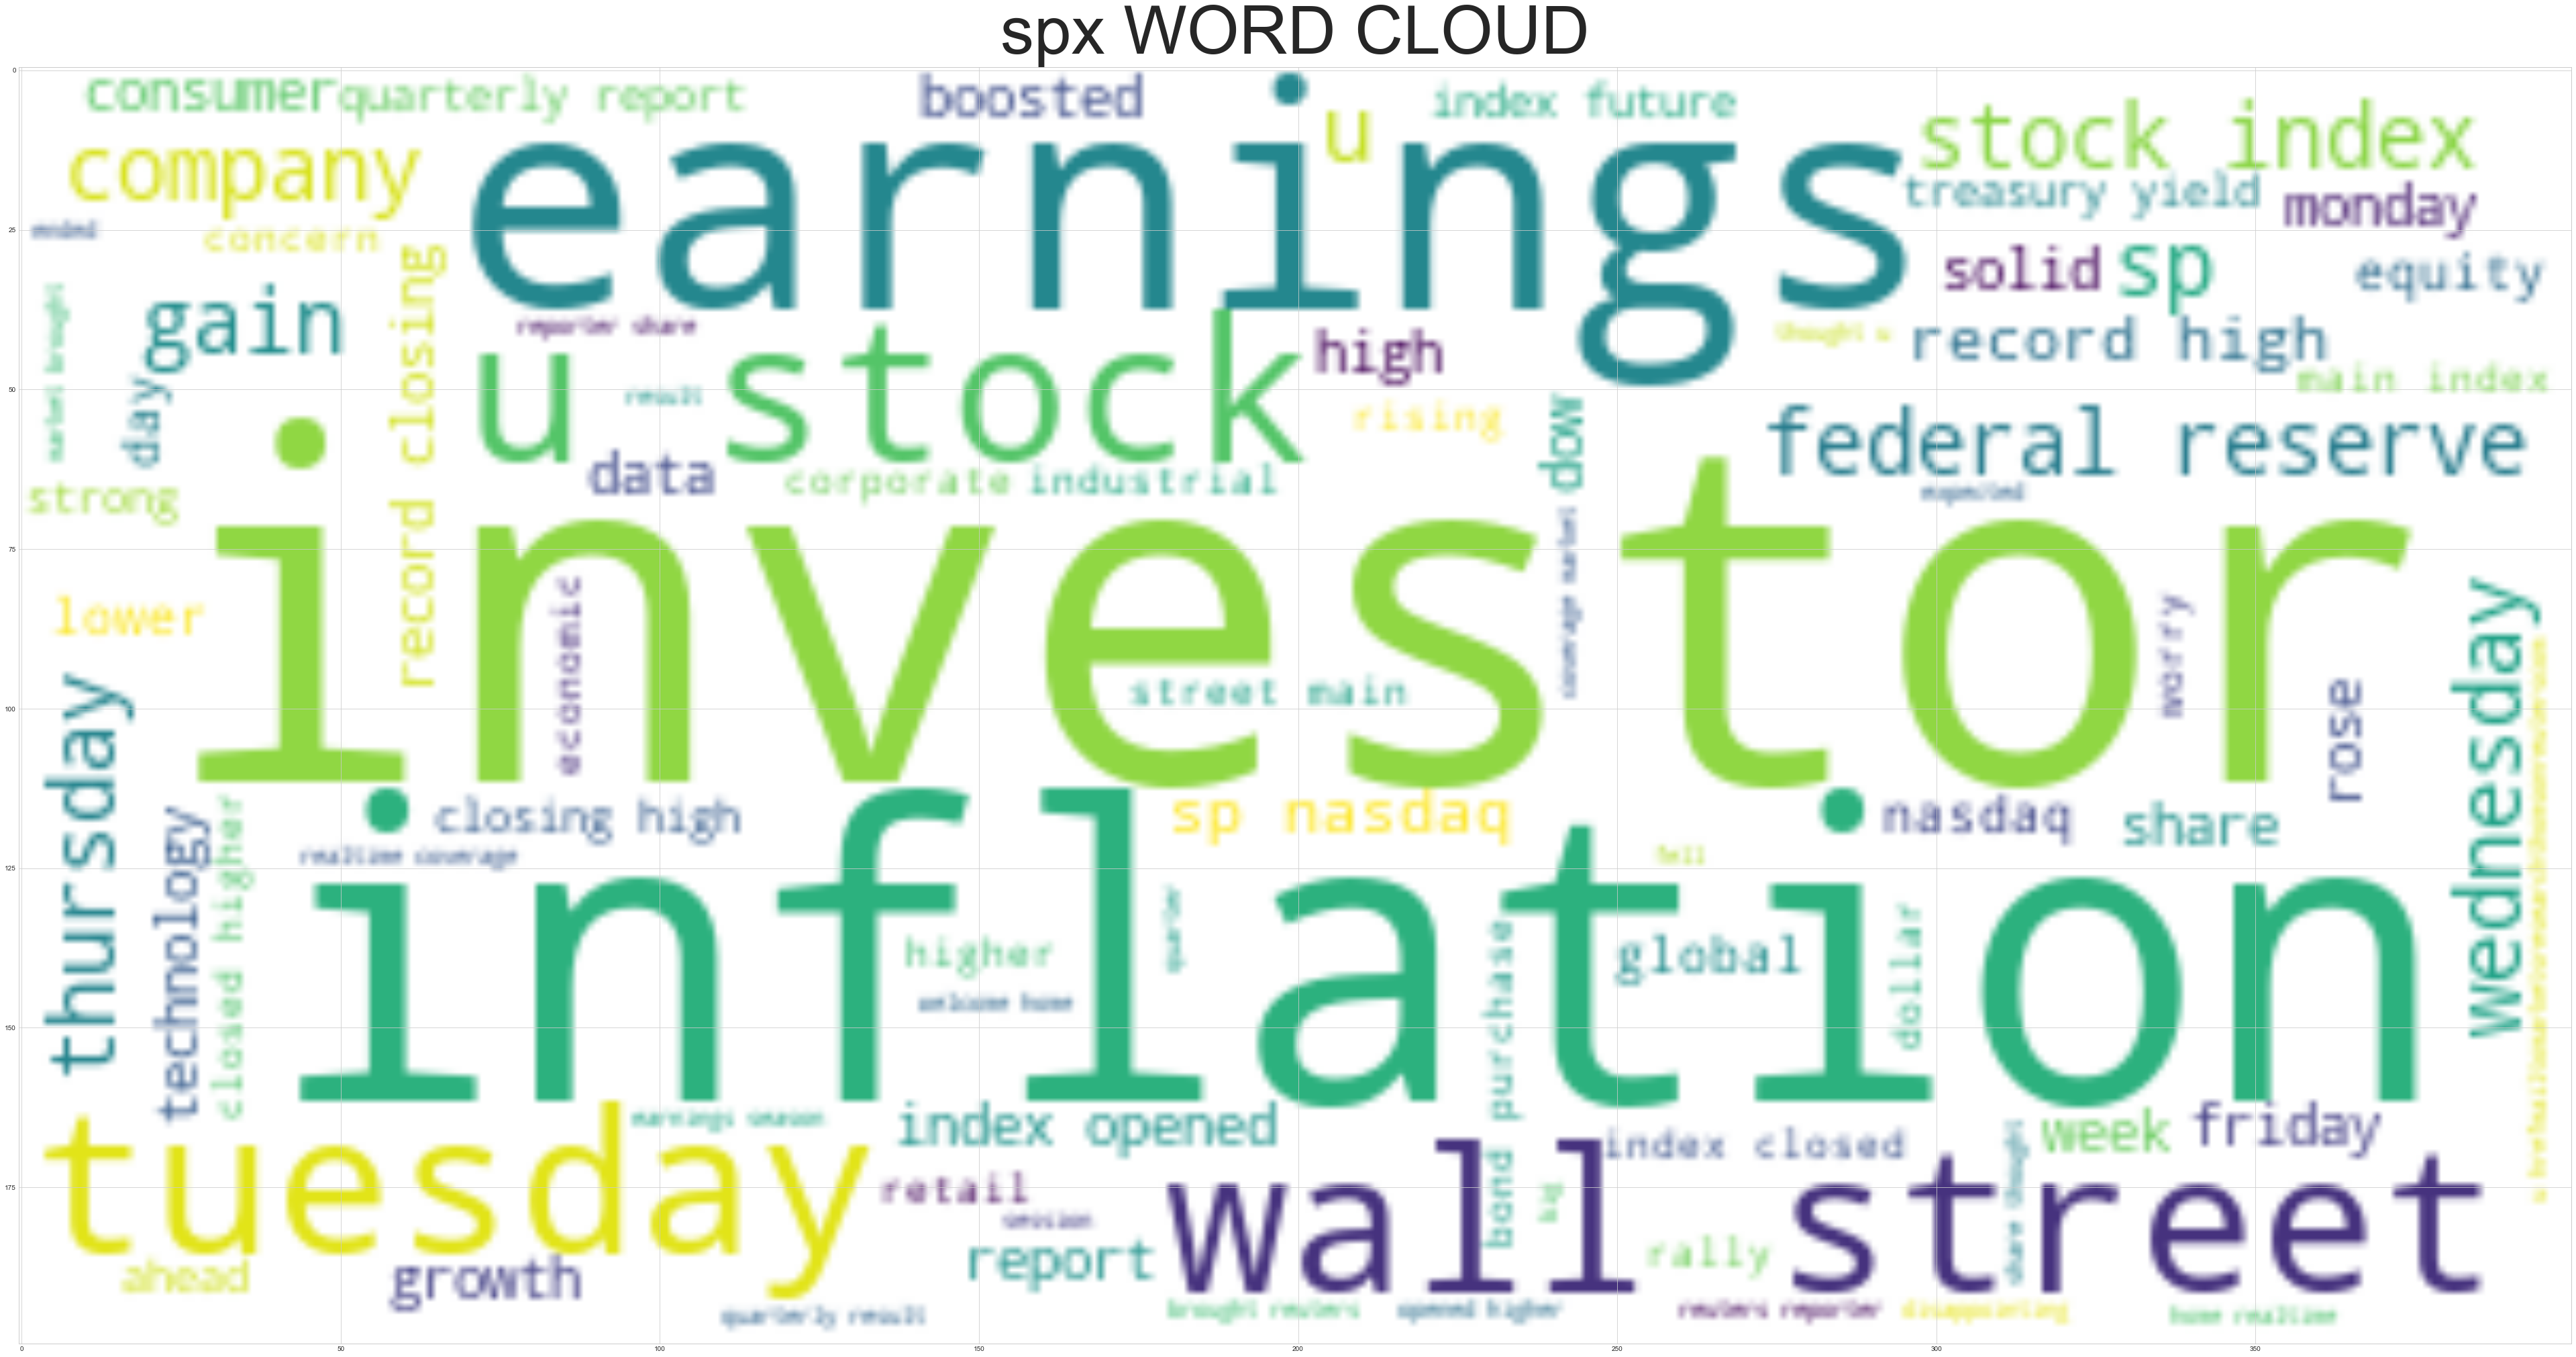

In [23]:
# Generate the stock word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_stock)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title(f"{value} WORD CLOUD",fontsize=100)
plt.show()

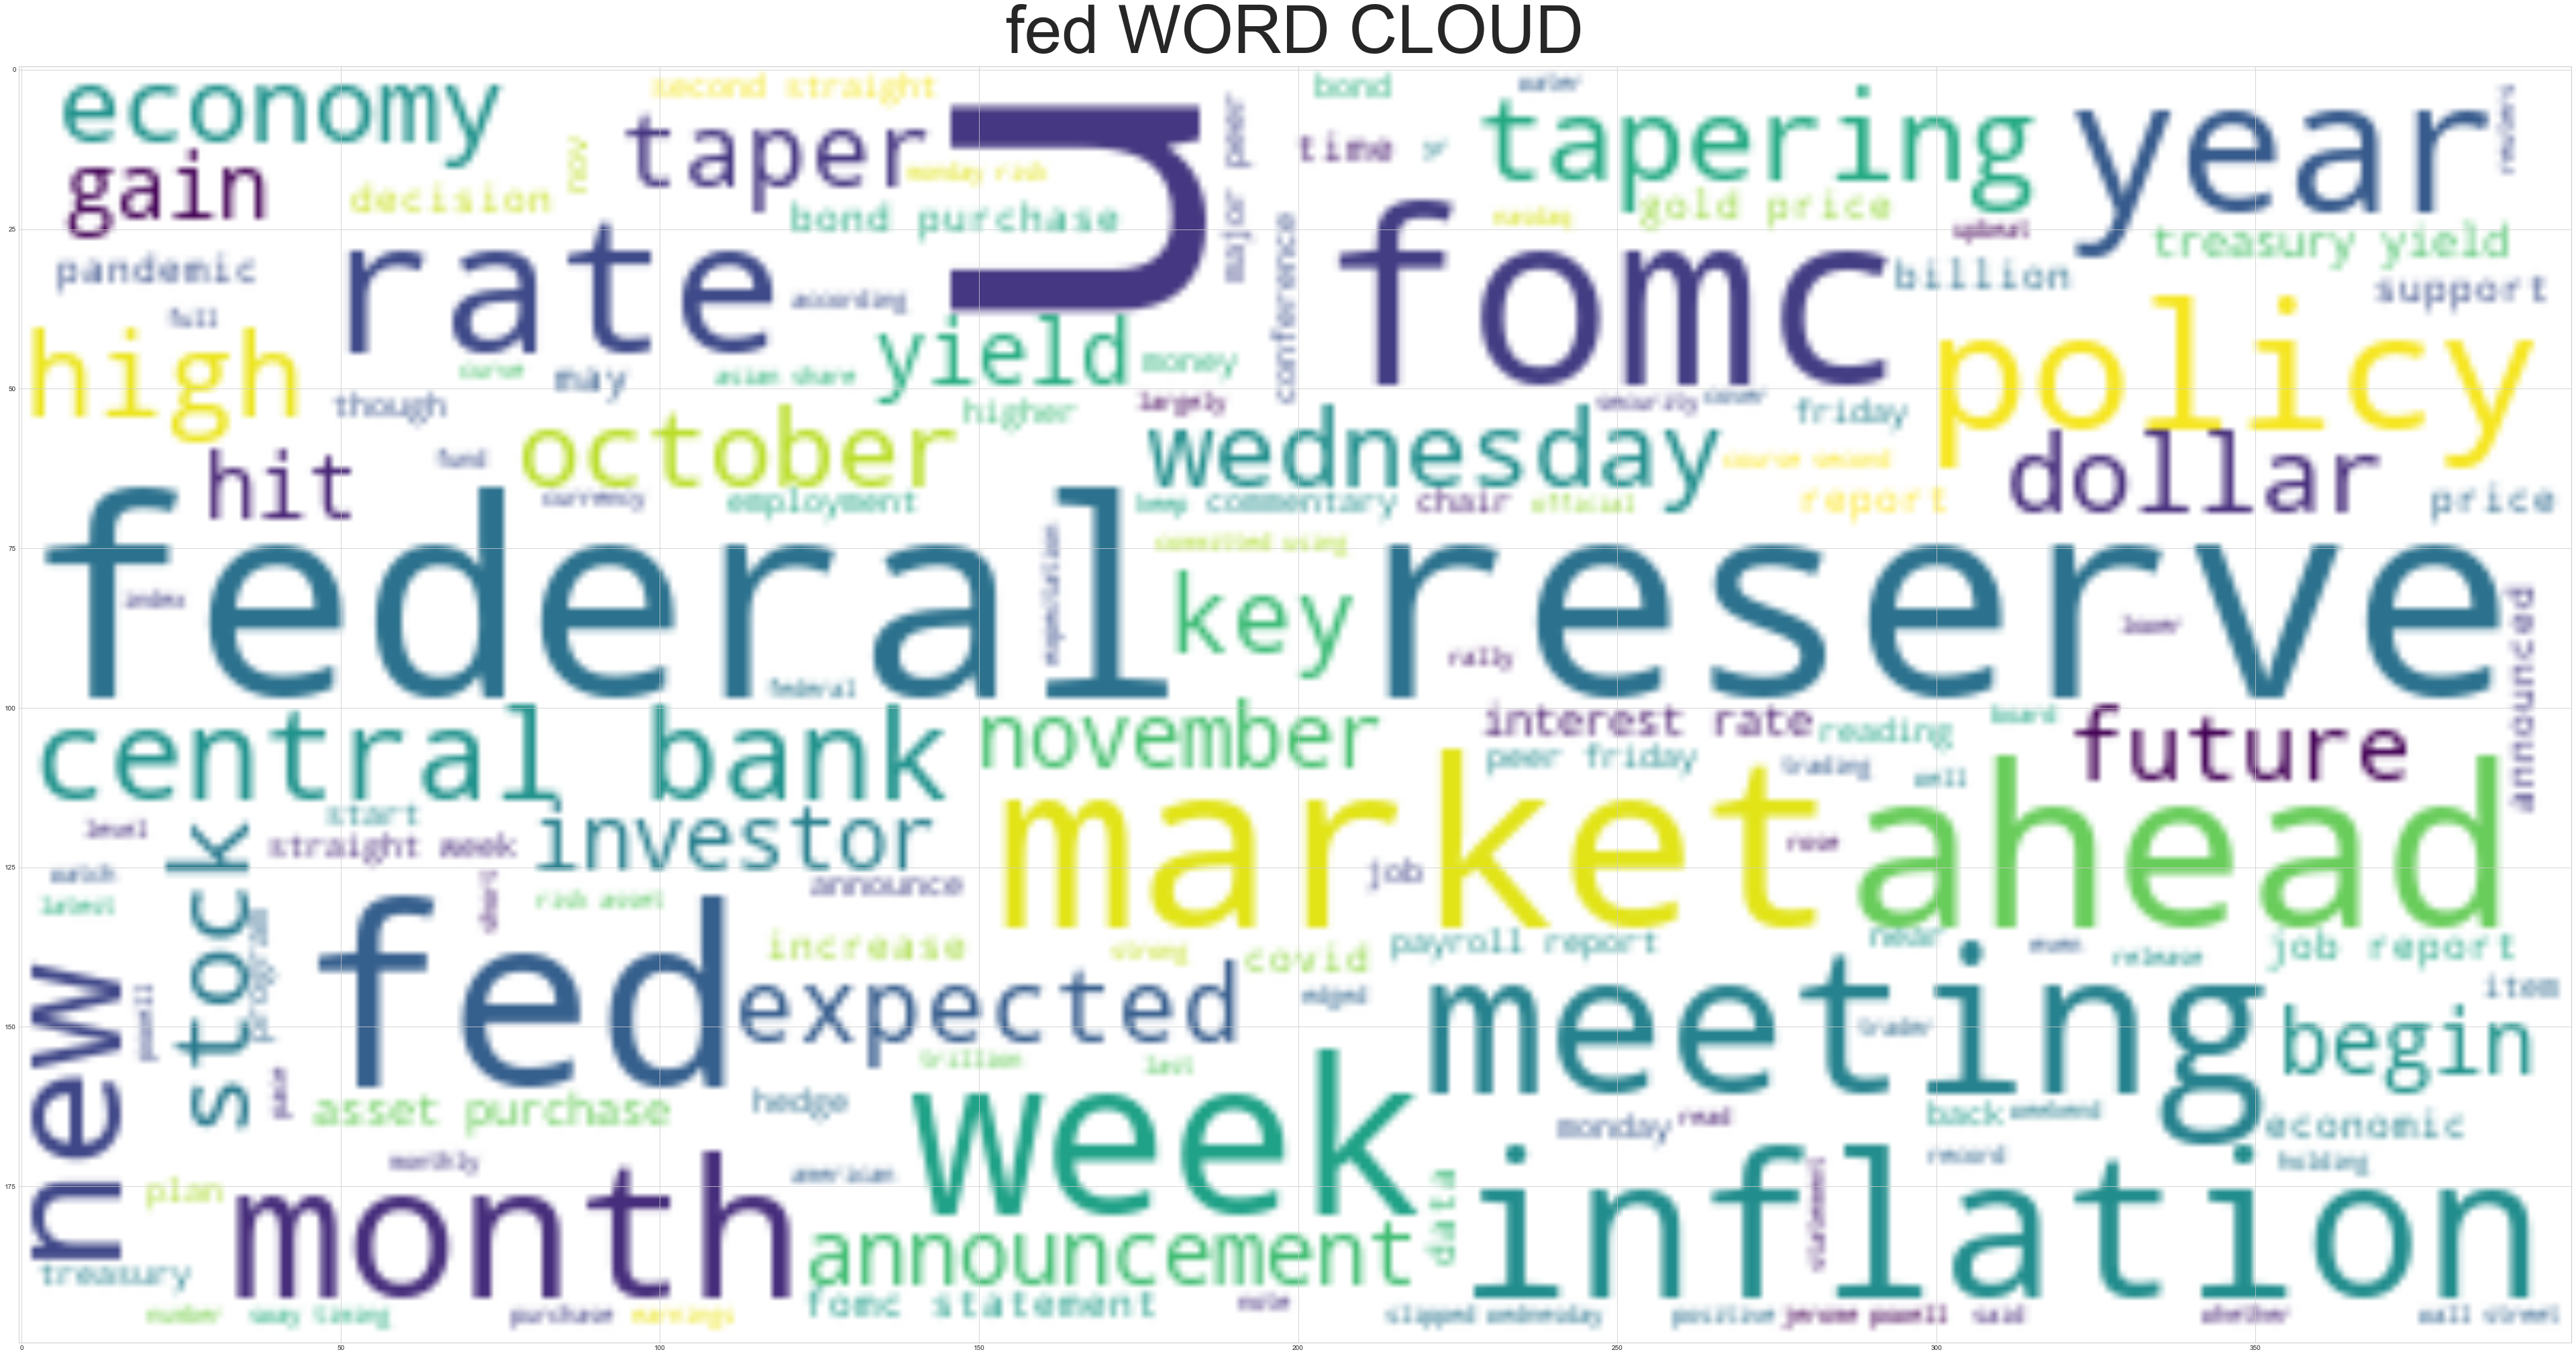

In [24]:
# Generate the Fed word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_fed)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title(f"fed WORD CLOUD",fontsize=100)
plt.show()